In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

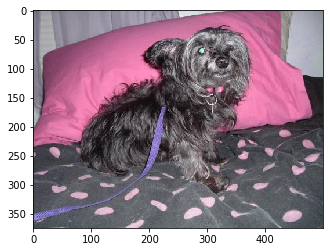

In [4]:
dog0 = cv2.imread('C:\\Users\\Ufuk Altan\\jupyter-lab files\\CATS_DOGS\\train\\DOG\\0.jpg')
dog0 = cv2.cvtColor(dog0, cv2.COLOR_BGR2RGB)
plt.imshow(dog0)

#PREPROCESSING

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1, # Randomly extent over the x axis
                              height_shift_range=0.1, # Randomly extent over the y axis
                              rescale=1/255, #Normalize
                              shear_range=0.2,  #Cuts away some part of the image
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest' #When playing, rescaling, reshaping images some pixels go missing
                              )

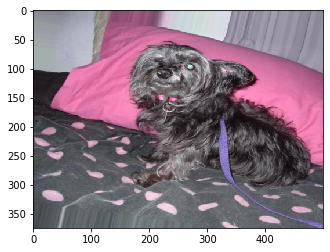

In [5]:
plt.imshow(image_gen.random_transform(dog0))

In [7]:
train_path = 'C:\\Users\\Ufuk Altan\\jupyter-lab files\\CATS_DOGS\\train'
test_path = 'C:\\Users\\Ufuk Altan\\jupyter-lab files\\CATS_DOGS\\test'

In [9]:
image_gen.flow_from_directory(train_path)

Found 18743 images belonging to 2 classes.


In [12]:
input_shape = (150,150,3)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation, Dropout

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150,150,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_2 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [23]:
train_image =image_gen.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode = 'binary')

test_image =image_gen.flow_from_directory(test_path,
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [20]:
train_image.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
result = model.fit_generator(train_image,epochs=1, steps_per_epoch=150,
                    validation_data=test_image, validation_steps=12)

150/150 [==============================] - 165s 1s/step - loss: 0.6928 - accuracy: 0.5092 - val_loss: 0.6945 - val_accuracy: 0.4792


In [41]:
result.history['acc']

In [ ]:
plt.plot(result.history['acc'])

In [27]:
from keras.models import load_model

In [28]:
new_model = load_model('cat_dog_100epochs.h5')

In [39]:
dog_file = test_path + '\\DOG\\9458.jpg'

In [37]:
from keras.preprocessing import image

In [45]:
dog_img = image.load_img(dog_file, target_size=(150,150))

In [46]:
dog_img = image.img_to_array(dog_img)

In [47]:
import numpy as np
dog_img = np.expand_dims(dog_img,  axis=0)
dog_img.shape

(1, 150, 150, 3)

In [48]:
dog_img = dog_img/255

In [ ]:
model.predict_classes(dog_img)

In [ ]:
model.predict(dog_img) #Probability